## Import packages and set seed

- It is highly probable that the folder "auxiliary_scripts" will change its name in the future.
- If this happens then it would be converted into a package called "wavesuite_auxiliary_scripts" and it would have to be installed and imported

In [1]:
#It is highly probable that this folder will chnage its name in th future
import sys

sys.path.insert(0, '../auxiliary_scripts/')

In [2]:
import time  
import numpy as np

from torch_geometric.loader import DataLoader

In [3]:
#import AE_Models
from train_AE_functions import set_seed, train_AE, model_MSE_error

from graph_functions import create_graph_data_list_mnist
from plot_results_mnist import evaluate_and_plot_mnist , compare_four_plots_models_mnist 

from rank_models import plot_losses , rank_losses 

In [4]:
set_seed(42)

True

## Create the list of Data objects where each element is a graph

In [5]:
graph_data_list_mnist , n_points = create_graph_data_list_mnist(num_samples_to_use=1000, mnist_path="../../Datasets/")

In [6]:
graph_data_list_mnist[0]

Data(x=[784, 1], edge_index=[2, 2970])

## Shuffle graph_data_list before splitting

In [7]:
#Compute the number of graphs
n_graphs = len(graph_data_list_mnist)

#Compute one random permutation
permutation0 = np.random.permutation(n_graphs)

In [8]:
shuffle = True

if shuffle:
    #Reorganize graph_data_list taking into account the previous random permutation
    input_graph_data_list = [graph_data_list_mnist[entry] for entry in permutation0]
else: 
    input_graph_data_list = graph_data_list_mnist

## Create DataLoaders

In [9]:
n_graphs = len(input_graph_data_list)

graph_data_list_train = input_graph_data_list[:int(n_graphs * 0.8)]
graph_data_list_validation = input_graph_data_list[int(n_graphs * 0.8):int(n_graphs * 0.9)]
graph_data_list_test = input_graph_data_list[int(n_graphs * 0.9):]

print(len(graph_data_list_train))
print(len(graph_data_list_validation))
print(len(graph_data_list_test))

800
100
100


In [10]:
NUM_GRAPHS_PER_BATCH = 32

train_loader = DataLoader(graph_data_list_train, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
validation_loader = DataLoader(graph_data_list_validation, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(graph_data_list_test, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

## Let's train some models

In [11]:
#This dictionary stores the losses results of the models
results_models = {}

In [12]:
#These are the models specifications
num_features = 1  #This is always 1
latent_space_dim = 32
num_epochs = 80  

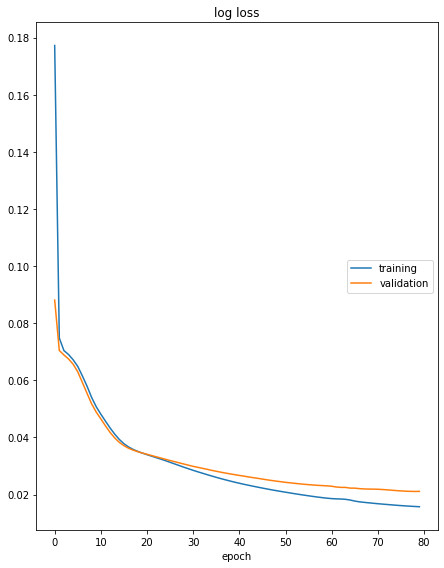

log loss
	training         	 (min:    0.016, max:    0.177, cur:    0.016)
	validation       	 (min:    0.021, max:    0.088, cur:    0.021)

 Number of parameters:  105392
Time taken:  26.251131057739258


In [13]:
start = time.time()

model_name = 'classic_AE'
embedding_sequence = None # There is no embedding sequence for classic AE, just input None

model1, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type=model_name, 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

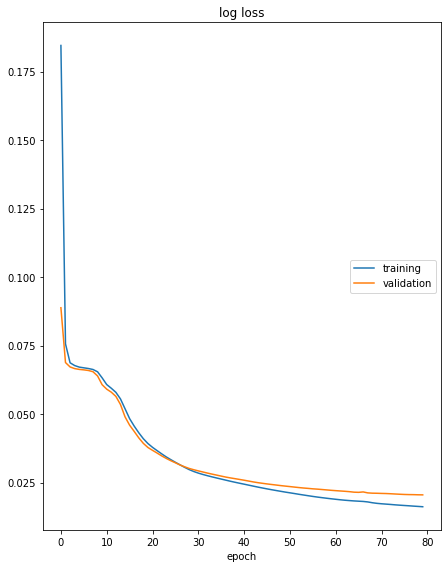

log loss
	training         	 (min:    0.016, max:    0.185, cur:    0.016)
	validation       	 (min:    0.021, max:    0.089, cur:    0.021)

 Number of parameters:  155762
Time taken:  33.32344079017639


In [14]:
start = time.time()

model_name = 'GCN_AE'
embedding_sequence = [8, 16, 2]  #The third entry determines the number of parameters

model2, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type=model_name, 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

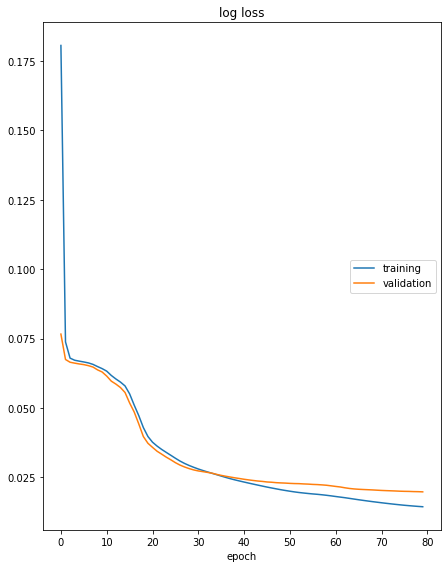

log loss
	training         	 (min:    0.014, max:    0.181, cur:    0.014)
	validation       	 (min:    0.020, max:    0.077, cur:    0.020)

 Number of parameters:  206915
Time taken:  44.13618493080139


In [15]:
start = time.time()

model_name = 'GCN_AE_GCN'
embedding_sequence = [8, 16, 2, 2, 16, 8]  #The third and fourth entries determine the number of parameters

model3, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type=model_name, 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

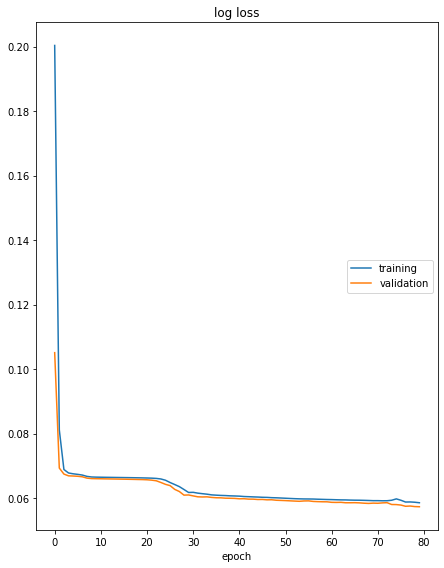

log loss
	training         	 (min:    0.059, max:    0.200, cur:    0.059)
	validation       	 (min:    0.057, max:    0.105, cur:    0.057)

 Number of parameters:  132144
Time taken:  62.90566873550415


In [16]:
start = time.time()

model_name = 'GCN_pooling_AE'
embedding_sequence = [8, 16, 32, 64, 128, 256]   #The last entry, sixth in this case, determines the number of parameters

model4, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type=model_name, 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

## MSE results

In [17]:
models_names = list( results_models.keys() )

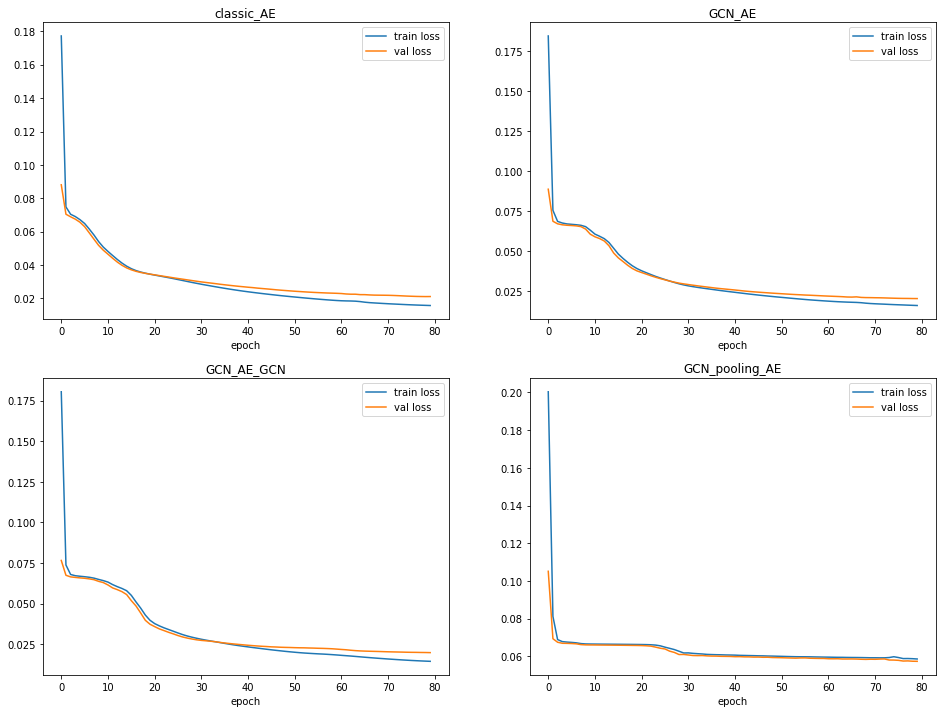

In [18]:
filename = 'mnist_models_losses.png'
plot_losses(results_models, models_names, filename=filename, figsize=(16,12))

In [19]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/4) )

,variants_name,final_validation_loss
0,classic_AE,0.034528
1,GCN_AE_GCN,0.037298
2,GCN_AE,0.037816
3,GCN_pooling_AE,0.065737


In [20]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/2) )

,variants_name,final_validation_loss
0,GCN_AE_GCN,0.024607
1,GCN_AE,0.026160
2,classic_AE,0.026970
3,GCN_pooling_AE,0.059905


In [21]:
first_column_model_name = 'AE Models Sigmoid output'
filename = 'mnist_models_losses.csv'

df_losses = rank_losses(results_models, models_names, selected_epoch = num_epochs,
                        first_column_model_name = first_column_model_name, 
                        filename = filename )

df_losses

CSV was saved


,Model name,variants_name,final_validation_loss
0,AE Models Sigmoid output,GCN_AE_GCN,0.019811
1,AE Models Sigmoid output,GCN_AE,0.020530
2,AE Models Sigmoid output,classic_AE,0.021112
3,AE Models Sigmoid output,GCN_pooling_AE,0.057320


In [22]:
print( 'model1 error: ', model_MSE_error(model1, test_loader) )
print( 'model2 error: ', model_MSE_error(model2, test_loader) )
print( 'model3 error: ', model_MSE_error(model3, test_loader) )
print( 'model4 error: ', model_MSE_error(model4, test_loader) )

model1 error:  0.018882595
model2 error:  0.018867893
model3 error:  0.018657329
model4 error:  0.05429688


# Plot the results

Indexes plotted [51 92 14]


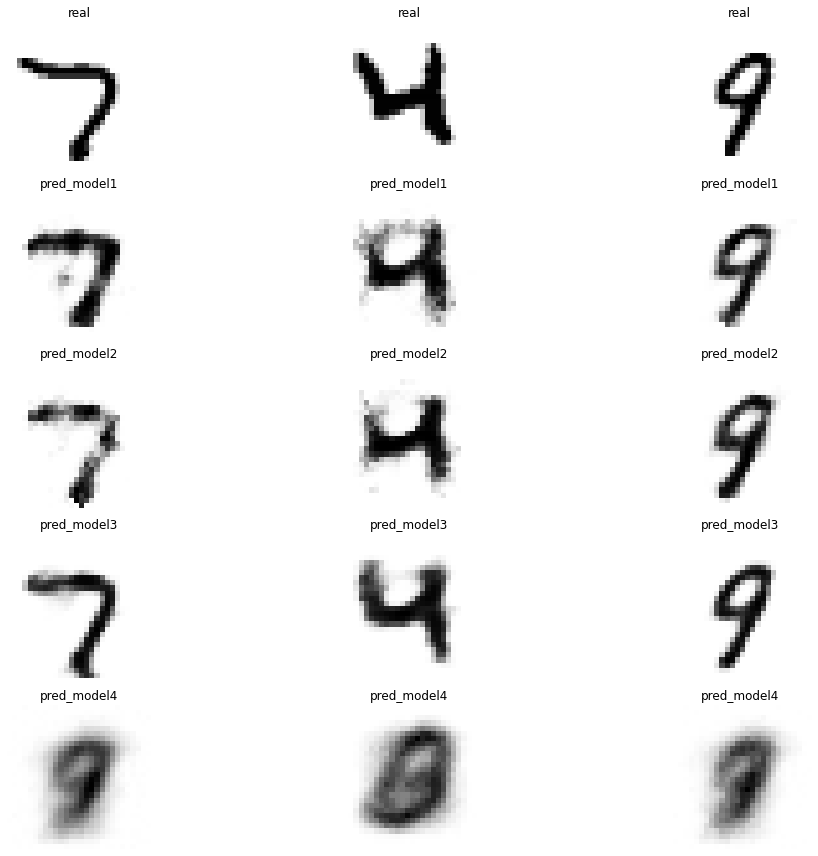

In [23]:
compare_four_plots_models_mnist(model1, model2, model3, model4, 
                               graph_data_list_test, nDisplay=3, axis_off=True, 
                               random=True, batch_size=32 ) 

Indexes plotted [71 60 20 82 86 74 74 87]


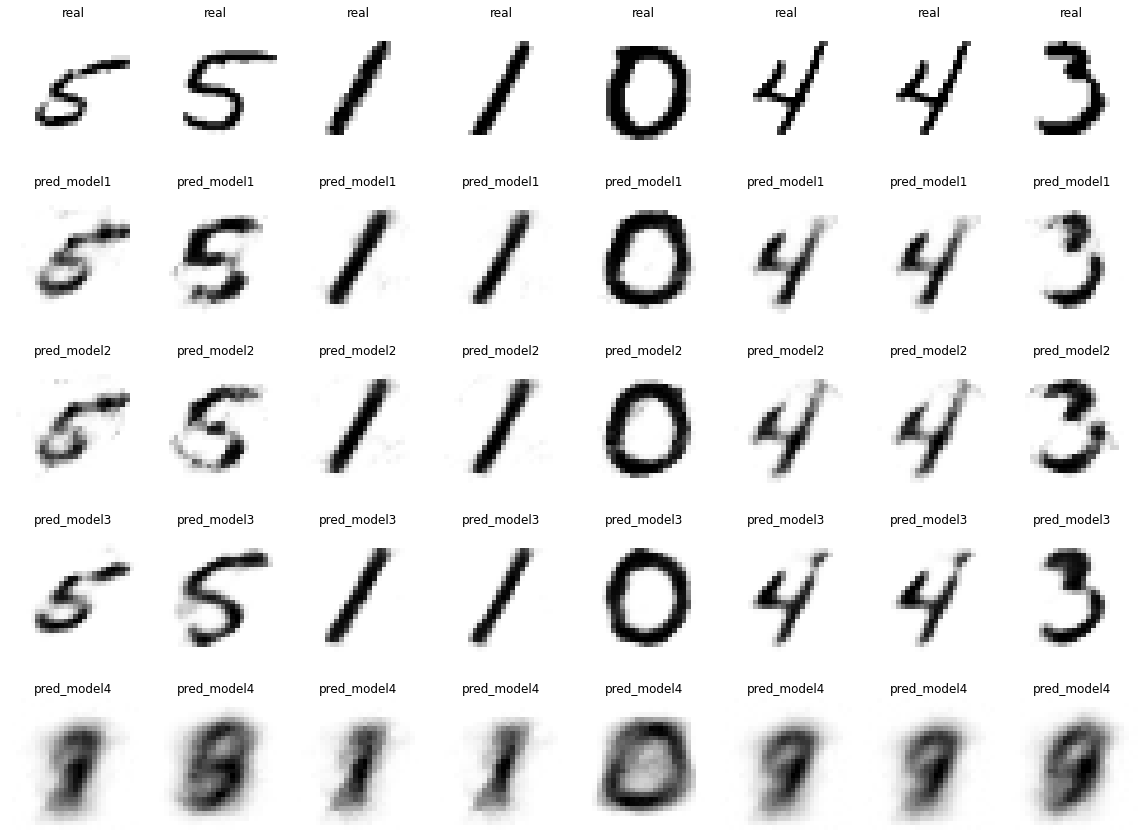

In [24]:
compare_four_plots_models_mnist(model1, model2, model3, model4, 
                               graph_data_list_test, nDisplay=8, axis_off=True, 
                               random=True, batch_size=32 ,save_fig=True, filename='mnist_models_decompressed.png' )